<a href="https://colab.research.google.com/github/ahmetbekir22/ahmetbekir22-MNIST-image-classifaction-with-CNN/blob/main/Fashion_MNIST_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

In [3]:
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
type(train_images)


numpy.ndarray

In [5]:
type(train_labels)

numpy.ndarray

In [6]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [7]:
print(len(train_images))
print(len(train_labels))

60000
60000


In [8]:
print(train_images[100])


[[  0   0   0   0   0   0   0   0   0   1   0   0  18 107 119 103   9   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  99 155 113  61 118 173 117
    0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0 110 136   0   0   0   0   0 167
  159   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   6   0  72 147   0   0   5   0   2   0   0
  174 118   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   1   5   0   0 174   4   0   4   0   0   0   0   0
    0 204  44   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   8   0 125 128   0   9   0   0   0   0   0   2
    0 107 152   0   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184   9   0   4   0   0   0   0   0   2
    0   0 190   0   0   2   0   0   0   0]
 [  0   0   0   1   0   2   0  73 158   0   0   0   0   1   0   0   0   0
    4   0 157  79   0   3   1   0   0   0]
 [  0   0   2   5   1   0   0 157  98   0   2   0   0   1   0   

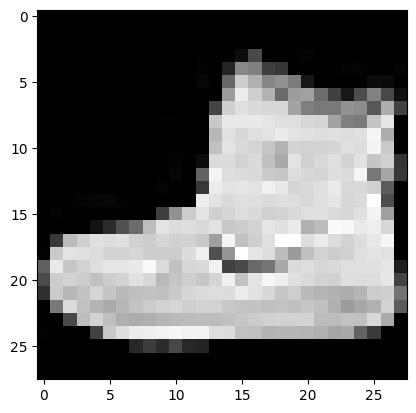

In [9]:
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [10]:
print(train_labels[0])

9


we want pixel values to be between 0 and 1 .so we divided by max number which is 255 for pictures.

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [13]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [14]:
print(train_images.shape)

(60000, 28, 28, 1)


In [15]:
print(test_images.shape)

(10000, 28, 28, 1)


**CNN**

In [16]:
# Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model.fit(
    train_images, train_labels,
    epochs=50,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9291 - loss: 0.1947 - val_accuracy: 0.9012 - val_loss: 0.2829
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9354 - loss: 0.1764 - val_accuracy: 0.9008 - val_loss: 0.2902
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9414 - loss: 0.1594 - val_accuracy: 0.8939 - val_loss: 0.3131
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9457 - loss: 0.1460 - val_accuracy: 0.8962 - val_loss: 0.3299


In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9012 - loss: 0.2829

Test accuracy: 0.901199996471405


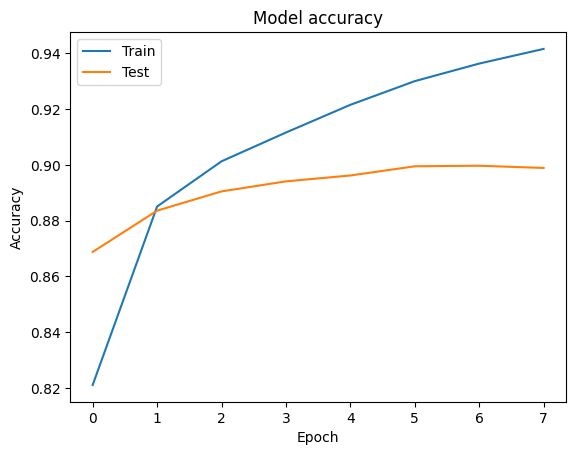

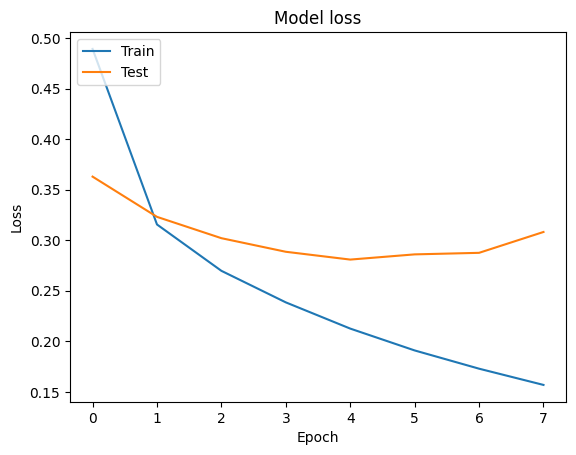

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [31]:
model.save('mnist_model.keras')


**Prediction**

In [46]:

# Sınıf isimlerini tanımla
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [47]:

# Eğitimli modeli yükle
model_path = '/content/mnist_model.keras'  # Model dosya yolunu kontrol et
model = tf.keras.models.load_model(model_path)


In [78]:

# Bir test görüntüsünü seç
index = int(input(f"pick a  image number to predict the image (0-{len(test_images)-1}): "))
test_image = test_images[index]
test_label = test_labels[index]

input_image = test_image.reshape((1, 28, 28, 1))


pick a  image number to predict the image (0-9999): 0


In [79]:
# Tahmin yap
predictions = model.predict(input_image)
predicted_class = np.argmax(predictions)
predicted_label = class_names[predicted_class]

# Sonuçları terminalde göster
print(f"Original name : {class_names[test_label]}")
print(f"predicted one: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Original name : Ankle boot
predicted one: Ankle boot


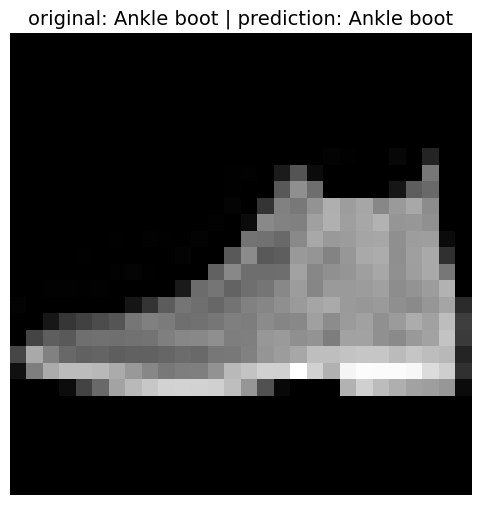

In [80]:

#draw the image
plt.figure(figsize=(6, 6))
plt.imshow(test_image, cmap='gray')
plt.title(f"original: {class_names[test_label]} | prediction: {predicted_label}", fontsize=14)
plt.axis('off')
plt.show()
